# 데이터시각화 특강 (13주차) 12월1일 
> pandas backend (2)

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [pandas backend, applymap]

### import 

In [1]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
from IPython.display import HTML

In [2]:
def show(fig): 
    return HTML(fig.to_html(include_plotlyjs='cdn',include_mathjax=False, config=dict({'scrollZoom':False})))

### pie 

#### 예제1 (matplotlib)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


<AxesSubplot:ylabel='Apple'>

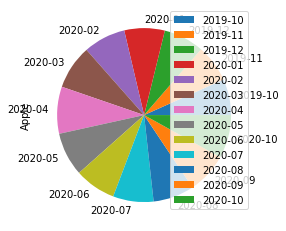

In [5]:
df.set_index('Date').plot.pie(y='Apple') # index 안 하면 레전드가 0,1,2,3,4 로 나타남

- 우리가 원하는 형태는 아님 

`-` 우리가 원하는 형태로 만들기 위해서는 (1) 트랜스포즈를 해야하고 (2) 인덱스가 Samsung, Apple, ... 와 같이 회사이름이 되어야함 

<AxesSubplot:ylabel='2019-10'>

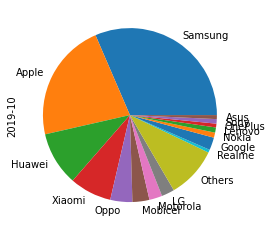

In [6]:
df.set_index('Date').T.plot.pie(y='2019-10',legend=False) # set_index date 지정 안 해준 상태로 하면 열 이름 위에서처럼 0,1,2,3 로 나타남

- 정상적인 플랏 

array([[<AxesSubplot:ylabel='2019-10'>, <AxesSubplot:ylabel='2019-11'>,
        <AxesSubplot:ylabel='2019-12'>, <AxesSubplot:ylabel='2020-01'>],
       [<AxesSubplot:ylabel='2020-02'>, <AxesSubplot:ylabel='2020-03'>,
        <AxesSubplot:ylabel='2020-04'>, <AxesSubplot:ylabel='2020-05'>],
       [<AxesSubplot:ylabel='2020-06'>, <AxesSubplot:ylabel='2020-07'>,
        <AxesSubplot:ylabel='2020-08'>, <AxesSubplot:ylabel='2020-09'>],
       [<AxesSubplot:ylabel='2020-10'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

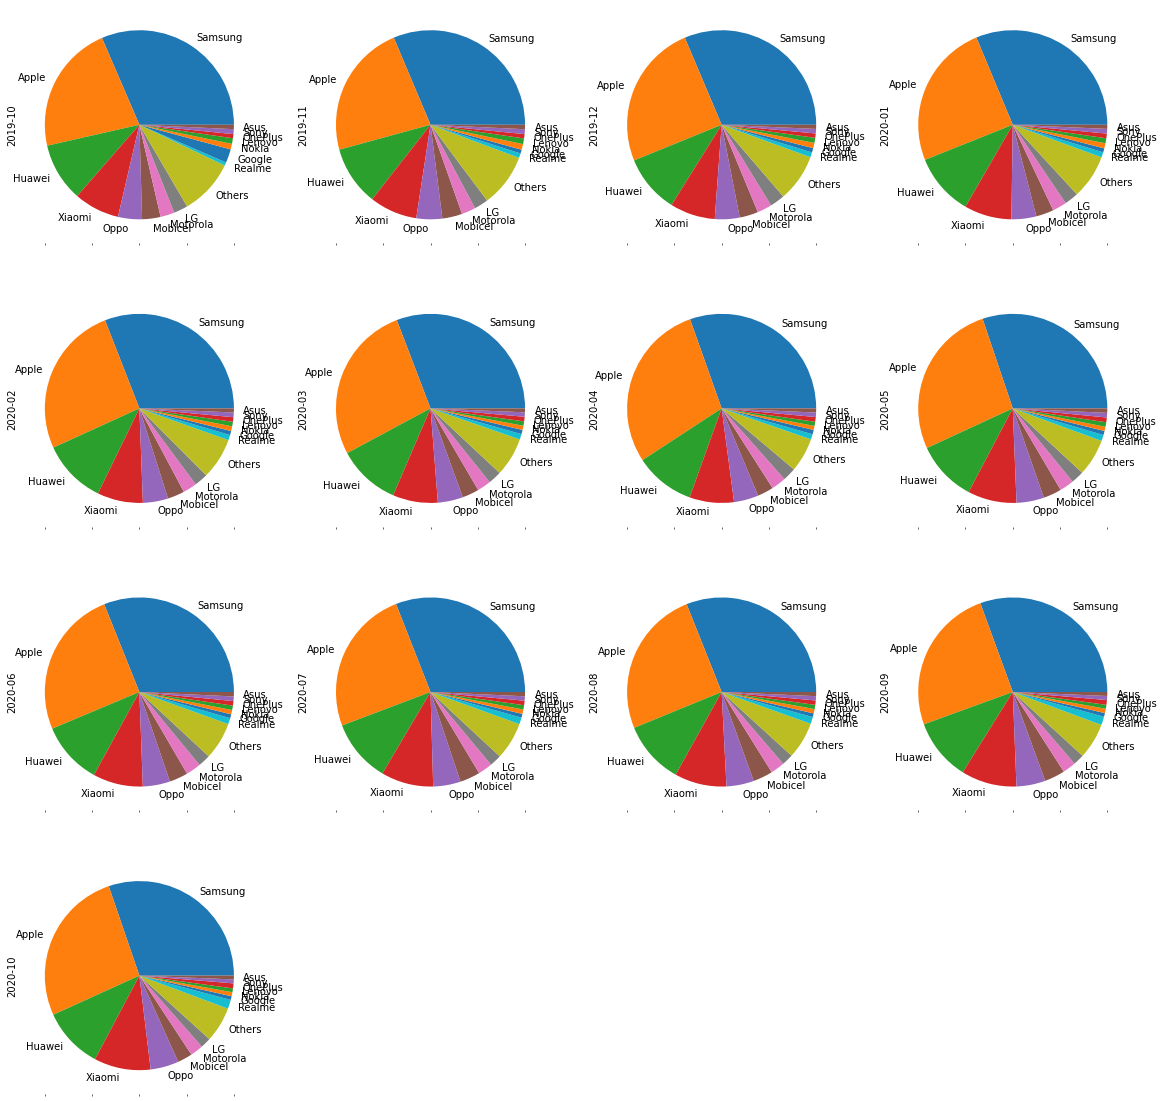

In [7]:
df.set_index('Date').T.plot.pie(legend=False,subplots=True,layout=(4,4),figsize=(20,20))

- 사실 숫자를 비교하기 위해서는 파이차트보다 바플랏이 좋음. 
- 그리고 시간에 따른 변화를 보기에는 라인차트가 좋음

plotly로는 그릴 수 없다,

### boxplot 

`-` plotly, matplotlib 백엔드 모두 지원 

#### 예제1(matplotlib)

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


`-` 점유율의 차이를 구하자. (.diff 차이 계산)

In [56]:
df.set_index('Date').diff().dropna() # 차이 계산한 후 에러값 없애기

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-11,-0.13,0.81,0.16,0.37,0.32,0.26,-0.01,0.00,-0.41,0.24,-1.69,0.02,0.01,0.03,-0.01,0.01
2019-12,0.01,1.89,-0.23,-0.43,-0.19,-0.22,0.10,0.14,-0.97,0.06,0.09,-0.07,-0.10,0.01,-0.06,-0.05
2020-01,-0.08,-0.03,0.66,0.37,0.02,-0.17,-0.08,-0.14,-0.58,0.04,-0.06,-0.02,-0.01,0.05,0.03,-0.01
2020-02,-0.38,1.13,0.37,-0.30,0.06,-0.13,-0.06,-0.06,-0.49,0.01,0.01,-0.07,-0.09,-0.01,0.00,0.00
2020-03,-0.11,1.14,-0.28,-0.10,-0.01,-0.02,-0.01,-0.06,-0.43,0.04,0.03,-0.09,-0.03,0.00,-0.04,-0.03
2020-04,-0.39,1.76,-0.42,-0.10,-0.10,-0.12,0.16,0.00,-0.79,-0.03,0.02,-0.03,-0.03,0.02,0.00,0.04
2020-05,-0.23,-2.07,0.11,0.76,0.50,0.37,-0.05,-0.09,0.47,0.14,-0.05,0.04,0.06,0.01,0.02,0.06
2020-06,0.88,-1.46,0.30,0.19,-0.05,0.06,0.11,-0.08,0.08,0.00,-0.02,0.01,-0.02,-0.04,0.00,-0.01
2020-07,-0.11,-0.44,0.06,0.39,0.04,0.28,-0.12,-0.08,0.02,0.09,-0.03,0.02,-0.01,-0.01,-0.03,-0.03


<AxesSubplot:>

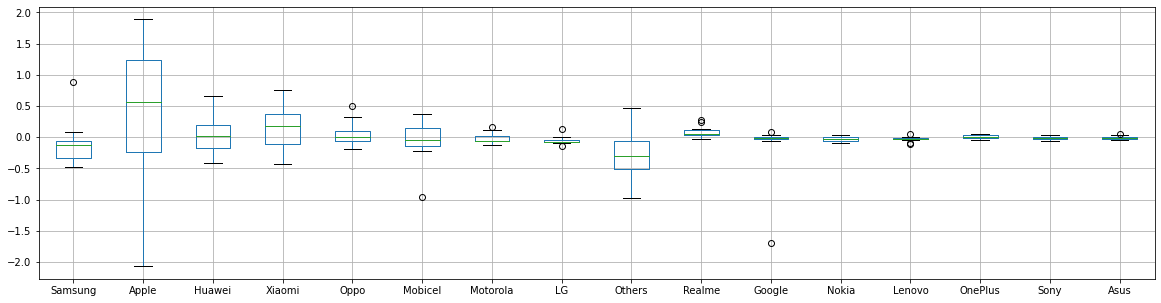

In [57]:
df.set_index('Date').diff().dropna().boxplot(figsize=(20,5))

- 삼성이 음수가 많은 것을 보니 점유율이 떨어지는 것 같다.
- 샤오미는 비슷하면서 올라가는 것 처럼 보임
- 애플은 올라가는 듯

- 너무 대기업 위주로 간다~ 이런 식으로 해석가능할 듯

#### 예제2 (plotly)

`-` 위와 동일한 그림을 plotly backend로도 그릴수 있음 (plotly가 조금 융통성이 있음) 

In [58]:
fig=df.set_index('Date').diff().dropna().boxplot(backend='plotly')
show(fig)

`-` 회사를 색깔별로 구분하여 범주를 만들고 싶다? 

In [60]:
df.set_index('Date').diff().dropna().head()

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-11,-0.13,0.81,0.16,0.37,0.32,0.26,-0.01,0.00,-0.41,0.24,-1.69,0.02,0.01,0.03,-0.01,0.01
2019-12,0.01,1.89,-0.23,-0.43,-0.19,-0.22,0.10,0.14,-0.97,0.06,0.09,-0.07,-0.10,0.01,-0.06,-0.05
2020-01,-0.08,-0.03,0.66,0.37,0.02,-0.17,-0.08,-0.14,-0.58,0.04,-0.06,-0.02,-0.01,0.05,0.03,-0.01
2020-02,-0.38,1.13,0.37,-0.30,0.06,-0.13,-0.06,-0.06,-0.49,0.01,0.01,-0.07,-0.09,-0.01,0.00,0.00
2020-03,-0.11,1.14,-0.28,-0.10,-0.01,-0.02,-0.01,-0.06,-0.43,0.04,0.03,-0.09,-0.03,0.00,-0.04,-0.03


In [61]:
df.set_index('Date').diff().dropna().melt()

,variable,value
0,Samsung,-0.13
1,Samsung,0.01
2,Samsung,-0.08
3,Samsung,-0.38
4,Samsung,-0.11
...,...,...
187,Asus,-0.01
188,Asus,-0.03
189,Asus,-0.02
190,Asus,-0.03


In [62]:
fig=df.set_index('Date').diff().dropna().melt().\
plot.box(backend='plotly',x='variable',color='variable',y='value')
show(fig)

- 색깔별로 회사를 구분하면 좋은 점! 범주를 클릭해보면 없어짐....

#### 예제3 (plotly)

In [14]:
import plotly.express as px 
df = px.data.tips() 
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


`-` 팁은 대체로 얼마나 받는지? 

tidy data 지원하는 plotly

In [16]:
fig=df.plot.box(backend='plotly',y='tip',height=500,width=400)
show(fig)

`-` 점심/저녁에 따라서 팁의 분포가 다를까? 

In [17]:
fig=df.plot.box(backend='plotly',y='tip',x='time',height=500,width=500)
show(fig)

- 저녁에 좀더 잘 주는것 같음 

`-` 성별에 따라서도 팁을 주는것이 다를까? 

In [18]:
fig=df.plot.box(backend='plotly',y='tip',x='time',color='sex', height=500,width=500)
show(fig)

- 점심, 저녁에 얼마만큼의 데이터가 있는지 파악하기 힘들다. 각 tip에서 데이터가 얼마나 있는지!

In [19]:
fig=df.plot.box(backend='plotly',y='tip',x='time',color='sex', height=500,width=500, points='all')
show(fig)

- boxplot의 아웃라이어가 사라지고, 데이터를 더 리치하게 볼 수 있다. 

`-` 요일에 따라서도 달라질까?

In [20]:
fig=df.plot.box(backend='plotly',y='tip',x='time',color='sex',facet_col='day', points='all')
show(fig)

`-` 흡연유무에 따라서도 달라질까? 

In [21]:
fig=df.plot.box(backend='plotly',y='tip',x='time',color='sex',facet_col='day', facet_row='smoker',points='all')
show(fig)

- tidydata로 한번 만들어 두니 너무 쉽게 생각하는 대로 구현가능 

`-` tidydata가 확실히 고차원 자료를 그리기에 유리함. matplotlib은 위와 같은 형태를 그리는것 자체가 불가능 

### hist, kde, density 

#### 예제1 (matplotlib) 

`-` 시뮬레이션예제: 정규분포를 만들어서 제곱한뒤에 3개씩, 4개씩, ... , 10개까지 더함 $\to$ 카이제곱분포 
- 제곱+제곱+제곱 이렇게

`-` 일단 3개부터 구현해보자. 

In [29]:
X = np.random.normal(size=(1000,3),loc=0,scale=1)
X

array([[ 1.45013082,  0.05980003,  0.74236251],
       [-0.01784632, -1.00032105, -1.70464025],
       [ 1.29257208, -0.50146393,  0.42647003],
       ...,
       [ 0.53952536, -1.12314112, -1.05858509],
       [ 0.0803079 , -0.68334236, -0.50773505],
       [-0.78857312,  1.2096069 , -0.21881562]])

In [30]:
X**2

array([[2.10287938e+00, 3.57604301e-03, 5.51102096e-01],
       [3.18491262e-04, 1.00064219e+00, 2.90579838e+00],
       [1.67074259e+00, 2.51466075e-01, 1.81876689e-01],
       ...,
       [2.91087615e-01, 1.26144597e+00, 1.12060240e+00],
       [6.44935912e-03, 4.66956776e-01, 2.57794877e-01],
       [6.21847565e-01, 1.46314885e+00, 4.78802754e-02]])

In [34]:
# (X**2).sum(axis=1)
# row 제곱해서 더해주기 위해 axis 1 대입

`-` 코드를 정리하면 

In [36]:
# ((np.random.normal(size=(1000,3),loc=0,scale=1))**2).sum(axis=1)
# ((np.random.normal(size=(1000,4),loc=0,scale=1))**2).sum(axis=1)
# ...
# ((np.random.normal(size=(1000,10),loc=0,scale=1))**2).sum(axis=1)

In [35]:
_arr = [3,4,5,6,7,8,9,10] 
df= pd.DataFrame([((np.random.normal(size=(1000,_arr[i]),loc=0,scale=1))**2).sum(axis=1).tolist() for i in range(len(_arr))]).T
# 트랜스포즈 시킨 이유 행 순으로 데이터가 합쳐져서
df

,0,1,2,3,4,5,6,7
0,1.709402,4.329180,3.295861,7.525184,1.900673,8.552997,9.879809,14.982058
1,2.442544,2.124648,5.276832,1.871502,7.871514,5.894076,9.205179,9.819631
2,1.116255,3.507569,3.082188,3.292537,6.762586,3.850168,3.823936,12.266632
3,0.874157,9.981919,6.314950,8.843233,2.891825,10.292921,8.244490,11.290066
4,1.091891,5.150329,4.753767,16.067243,5.477903,5.374295,11.059173,9.718722
...,...,...,...,...,...,...,...,...
995,3.446029,2.918771,4.377861,6.472421,9.031750,9.150178,4.460204,6.400086
996,4.428969,0.741989,9.233880,8.510713,5.208738,6.437199,11.742028,11.584608
997,1.394210,4.514765,7.706115,4.996182,7.553810,18.869501,10.216604,9.105667
998,1.136809,2.006308,3.802858,8.279644,10.389050,22.282815,6.112830,9.498077


- 컬럼 0이 의미하는것은 정규분포를 제곱하여 3개씩 더하여 나온값이고 컬럼1이 의미하는것은 정규분포를 제곱해서 4개씩 더해서 나온값임 $\to$ 열의 이름을 지어주자. 

In [37]:
df.columns = _arr

In [38]:
df

,3,4,5,6,7,8,9,10
0,1.709402,4.329180,3.295861,7.525184,1.900673,8.552997,9.879809,14.982058
1,2.442544,2.124648,5.276832,1.871502,7.871514,5.894076,9.205179,9.819631
2,1.116255,3.507569,3.082188,3.292537,6.762586,3.850168,3.823936,12.266632
3,0.874157,9.981919,6.314950,8.843233,2.891825,10.292921,8.244490,11.290066
4,1.091891,5.150329,4.753767,16.067243,5.477903,5.374295,11.059173,9.718722
...,...,...,...,...,...,...,...,...
995,3.446029,2.918771,4.377861,6.472421,9.031750,9.150178,4.460204,6.400086
996,4.428969,0.741989,9.233880,8.510713,5.208738,6.437199,11.742028,11.584608
997,1.394210,4.514765,7.706115,4.996182,7.553810,18.869501,10.216604,9.105667
998,1.136809,2.006308,3.802858,8.279644,10.389050,22.282815,6.112830,9.498077


`-` 분포를 그려보자. 

<AxesSubplot:ylabel='Frequency'>

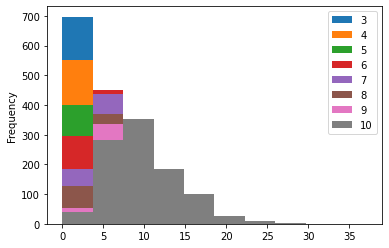

In [39]:
df.plot.hist()

- 알 수 가 없다. 

`-` bins와 투명도 조절 

<AxesSubplot:ylabel='Frequency'>

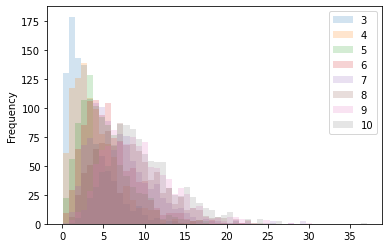

In [40]:
df.plot.hist(alpha=0.2,bins=50)

`-` 서브플랏 

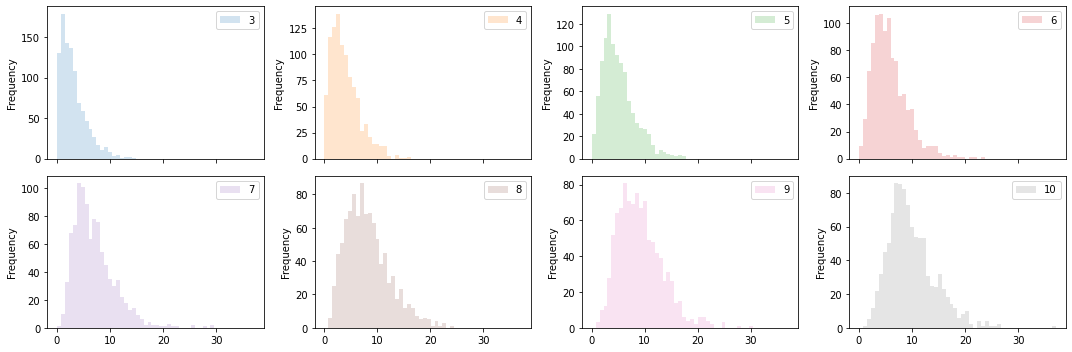

In [41]:
df.plot.hist(alpha=0.2,bins=50,layout=(2,4),subplots=True,figsize=(15,5))
plt.tight_layout() 

`-` kde 플랏 

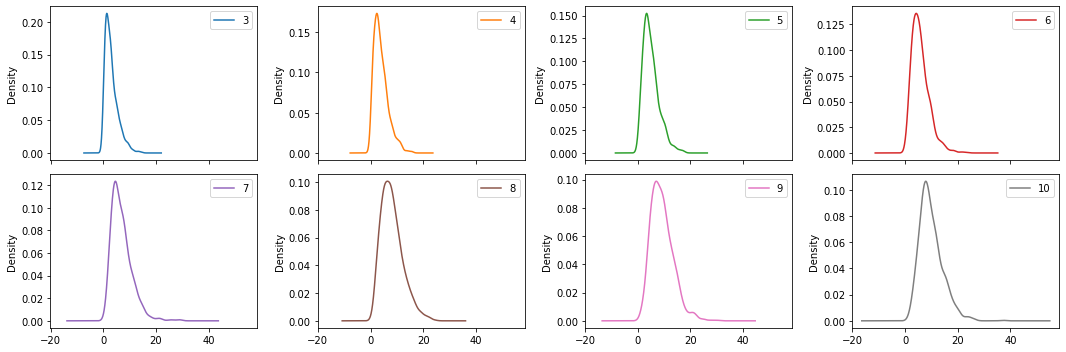

In [43]:
df.plot.kde(layout=(2,4),subplots=True,figsize=(15,5))
plt.tight_layout()
# kernel density estimation

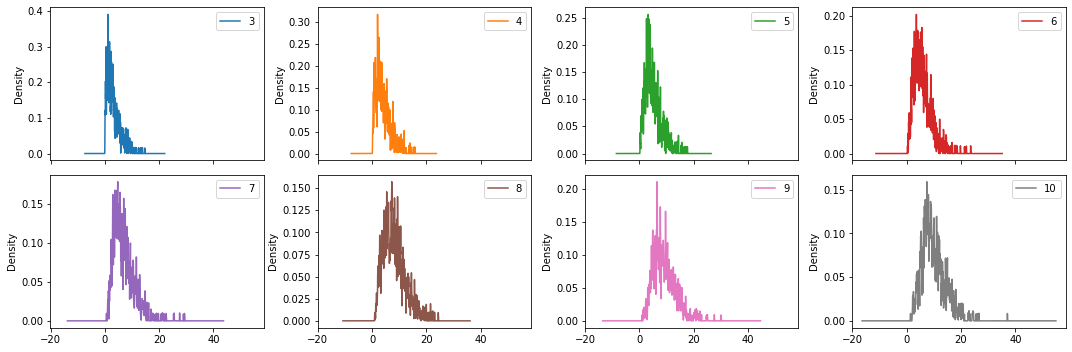

In [47]:
df.plot.kde(layout=(2,4),subplots=True,bw_method=0.01,figsize=(15,5))
plt.tight_layout()

- The method used to calculate the estimator bandwidth. This can be ‘scott’, ‘silverman’, a scalar constant or a callable. If a scalar, this will be used directly as kde.factor. If a callable, it should take a gaussian_kde instance as only parameter and return a scalar. If None (default), ‘scott’ is used. See Notes for more details.

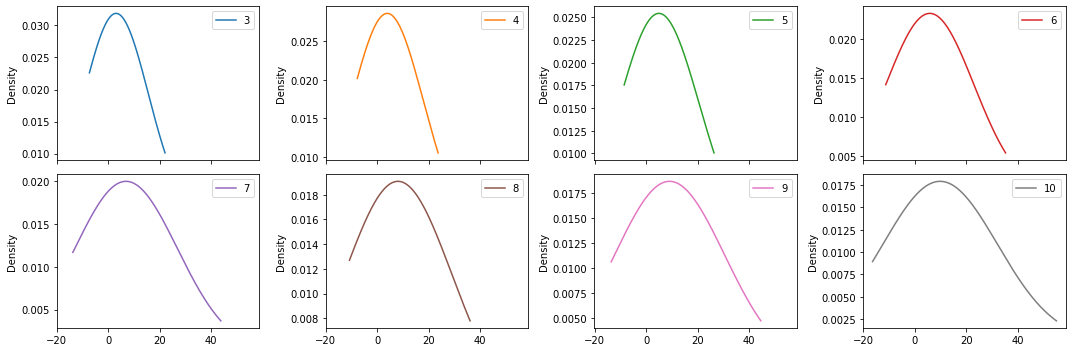

In [48]:
df.plot.kde(layout=(2,4),subplots=True,bw_method=5,figsize=(15,5))
plt.tight_layout()

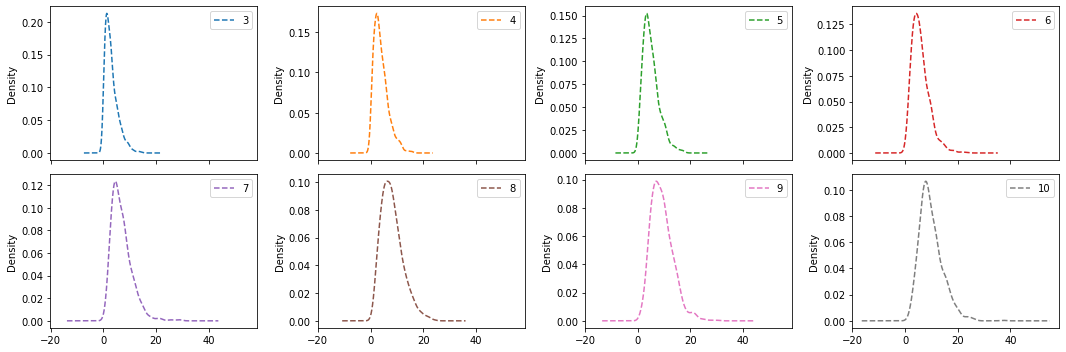

In [50]:
df.plot.kde(layout=(2,4),subplots=True,figsize=(15,5),ls='--')
plt.tight_layout()
# 우리가 이름을 지정하지 않았지만, plt로 변수 이름 받는 듯.
# 이를 이용해서 폭 크기 알맞게 지정해주는 tight_layout()

#### 예제2 (plotly) 

`-` 다시 tips 예제로 돌아오자. 

In [51]:
import plotly.express as px 
df = px.data.tips() 
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


`-` 성별에 따라서 팁을 주는게 다를까? 

In [52]:
fig=df.plot.hist(x='tip',color='sex',backend='plotly',facet_col='sex')
show(fig)

- 빈도가 잘 보인다는 측면에서 박스플랏보다 좋은것 같음 

`-` 시간에 따라서도 다른지? 

In [53]:
fig=df.plot.hist(x='tip',color='sex',backend='plotly',facet_col='sex',facet_row='time')
show(fig)

- tidydata가 확실히 자료를 처리하기 편리함 

### area plot 

`-` 주류플랏은 아님 

ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html

#### 예제1 (matplotlib) 

`-` 다시 핸드폰예제 

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


`-` 점유율을 area plot으로 나타내고 싶을 경우 

In [65]:
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


<AxesSubplot:xlabel='Date'>

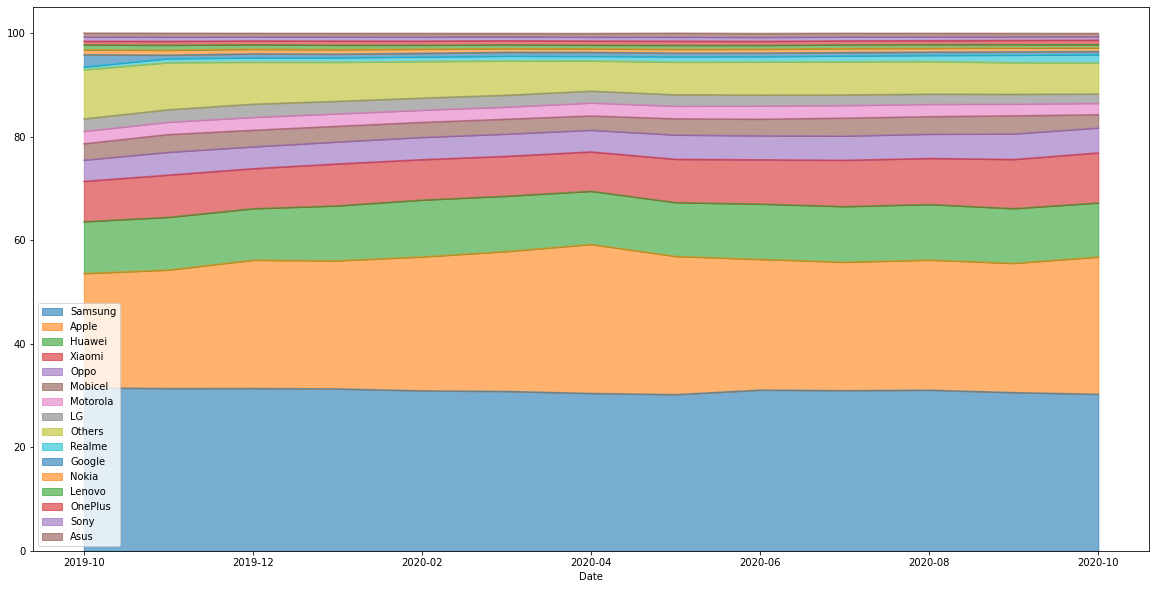

In [68]:
df.set_index('Date').plot.area(figsize=(20,10),alpha=0.6)

- 시간에 따른 점유을의 변화를 보기에 적절한것 같다. 

- stacked=False 사용 가능

#### 예제2 (plotly)

`-` plotly를 쓰기 위해서 tidydata로 바꾸자 

In [69]:
df.melt(id_vars='Date')

,Date,variable,value
0,2019-10,Samsung,31.49
1,2019-11,Samsung,31.36
2,2019-12,Samsung,31.37
3,2020-01,Samsung,31.29
4,2020-02,Samsung,30.91
...,...,...,...
203,2020-06,Asus,0.75
204,2020-07,Asus,0.72
205,2020-08,Asus,0.70
206,2020-09,Asus,0.67


In [71]:
fig=df.melt(id_vars='Date').plot.area(backend='plotly',x='Date',y='value',color='variable')
show(fig)

#### 예제3 (matplotlib) 

`-` 위키의 테이블 크롤링. 

In [73]:
df=pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')[19]
df

행정구역별 2021. 06           2015           2010           2005           \
      행정구역별       비율       인구    비율       인구    비율       인구    비율       인구   
0        전국     16.7  8652198  13.1  6775101  10.9  5506352   8.9  4324524   
1     서울특별시     16.4  1568769  12.6  1262436   9.7  1002770   7.2   731349   
2     부산광역시     19.8   666644  14.6   514630  11.3   401784   8.3   302784   
3     대구광역시     17.0   408235  12.7   316122  10.0   252084   7.8   195419   
4     인천광역시     14.4   422658  10.7   312905   8.6   237805   6.9   178602   
5     광주광역시     14.5   208879  11.3   166389   9.0   130457   7.1    99389   
6     대전광역시     14.8   215997  10.9   165528   8.7   130245   6.9    99811   
7     울산광역시     13.1   147811   8.8   103205   6.8    76800   5.3    57797   
8   세종특별자치시     10.0    36194  10.6    22399     -        -     -        -   
9       경기도     13.5  1825846  10.5  1318882   8.7  1022456   7.1   755511   
10      강원도     21.2   325579  16.9   261671  14.8   226505  12.1   183471   
11     충청북도     18.4   294530  14.8   234813  13.2   204470  11.3   168670   
12     충청남도     19.5   412504  16.4   341214  14.9   308556  13.3   261800   
13     전라북도     21.8   391178  17.8   333524  15.2   284373  12.9   243721   
14     전라남도     23.9   440014  20.5   391837  18.3   350900  15.6   306439   
15     경상북도     22.2   585088  17.7   479634  15.6   418858  13.4   360068   
16     경상남도     17.9   594154  13.8   464019  11.8   388648  10.2   323898   
17  제주특별자치도     16.0   108118  13.8    85893  12.2    69641  10.0    55795   

    2000           
      비율       인구  
0    7.0  3355614  
1    5.4   558566  
2    6.0   229075  
3    5.9   149045  
4    5.4   138316  
5    5.6    77325  
6    5.5    75769  
7    4.0    42119  
8      -        -  
9    5.7   524807  
10   9.3   143945  
11   9.1   136160  
12  11.2   215059  
13  10.3   205807  
14  11.9   254370  
15  10.7   300614  
16   8.4   261303  
17   8.0    43334

- 끔찍할 정도로 타이디 하지 않은 자료 

`-` 첫번째 row는 일단 제외해야함 

In [75]:
df.iloc[1:]

행정구역별 2021. 06           2015           2010           2005          \
      행정구역별       비율       인구    비율       인구    비율       인구    비율      인구   
1     서울특별시     16.4  1568769  12.6  1262436   9.7  1002770   7.2  731349   
2     부산광역시     19.8   666644  14.6   514630  11.3   401784   8.3  302784   
3     대구광역시     17.0   408235  12.7   316122  10.0   252084   7.8  195419   
4     인천광역시     14.4   422658  10.7   312905   8.6   237805   6.9  178602   
5     광주광역시     14.5   208879  11.3   166389   9.0   130457   7.1   99389   
6     대전광역시     14.8   215997  10.9   165528   8.7   130245   6.9   99811   
7     울산광역시     13.1   147811   8.8   103205   6.8    76800   5.3   57797   
8   세종특별자치시     10.0    36194  10.6    22399     -        -     -       -   
9       경기도     13.5  1825846  10.5  1318882   8.7  1022456   7.1  755511   
10      강원도     21.2   325579  16.9   261671  14.8   226505  12.1  183471   
11     충청북도     18.4   294530  14.8   234813  13.2   204470  11.3  168670   
12     충청남도     19.5   412504  16.4   341214  14.9   308556  13.3  261800   
13     전라북도     21.8   391178  17.8   333524  15.2   284373  12.9  243721   
14     전라남도     23.9   440014  20.5   391837  18.3   350900  15.6  306439   
15     경상북도     22.2   585088  17.7   479634  15.6   418858  13.4  360068   
16     경상남도     17.9   594154  13.8   464019  11.8   388648  10.2  323898   
17  제주특별자치도     16.0   108118  13.8    85893  12.2    69641  10.0   55795   

    2000          
      비율      인구  
1    5.4  558566  
2    6.0  229075  
3    5.9  149045  
4    5.4  138316  
5    5.6   77325  
6    5.5   75769  
7    4.0   42119  
8      -       -  
9    5.7  524807  
10   9.3  143945  
11   9.1  136160  
12  11.2  215059  
13  10.3  205807  
14  11.9  254370  
15  10.7  300614  
16   8.4  261303  
17   8.0   43334

`-` 일단 스택을 해보자. 

In [76]:
df.iloc[1:].stack()

2000    2005     2010       2015   2021. 06    행정구역별
1  비율        5.4     7.2      9.7       12.6       16.4      NaN
   인구     558566  731349  1002770  1262436.0  1568769.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN    서울특별시
2  비율        6.0     8.3     11.3       14.6       19.8      NaN
   인구     229075  302784   401784   514630.0   666644.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN    부산광역시
3  비율        5.9     7.8     10.0       12.7       17.0      NaN
   인구     149045  195419   252084   316122.0   408235.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN    대구광역시
4  비율        5.4     6.9      8.6       10.7       14.4      NaN
   인구     138316  178602   237805   312905.0   422658.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN    인천광역시
5  비율        5.6     7.1      9.0       11.3       14.5      NaN
   인구      77325   99389   130457   166389.0   208879.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN    광주광역시
6  비율        5.5     6.9      8.7       10.9       14.8      NaN
   인구      75769   99811   130245   165528.0   215997.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN    대전광역시
7  비율        4.0     5.3      6.8        8.8       13.1      NaN
   인구      42119   57797    76800   103205.0   147811.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN    울산광역시
8  비율          -       -        -       10.6       10.0      NaN
   인구          -       -        -    22399.0    36194.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN  세종특별자치시
9  비율        5.7     7.1      8.7       10.5       13.5      NaN
   인구     524807  755511  1022456  1318882.0  1825846.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN      경기도
10 비율        9.3    12.1     14.8       16.9       21.2      NaN
   인구     143945  183471   226505   261671.0   325579.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN      강원도
11 비율        9.1    11.3     13.2       14.8       18.4      NaN
   인구     136160  168670   204470   234813.0   294530.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN     충청북도
12 비율       11.2    13.3     14.9       16.4       19.5      NaN
   인구     215059  261800   308556   341214.0   412504.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN     충청남도
13 비율       10.3    12.9     15.2       17.8       21.8      NaN
   인구     205807  243721   284373   333524.0   391178.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN     전라북도
14 비율       11.9    15.6     18.3       20.5       23.9      NaN
   인구     254370  306439   350900   391837.0   440014.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN     전라남도
15 비율       10.7    13.4     15.6       17.7       22.2      NaN
   인구     300614  360068   418858   479634.0   585088.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN     경상북도
16 비율        8.4    10.2     11.8       13.8       17.9      NaN
   인구     261303  323898   388648   464019.0   594154.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN     경상남도
17 비율        8.0    10.0     12.2       13.8       16.0      NaN
   인구      43334   55795    69641    85893.0   108118.0      NaN
   행정구역별     NaN     NaN      NaN        NaN        NaN  제주특별자치도

`-` 서울~제주를 인덱스로 설정하고 다시 스택해보자 

In [77]:
df.iloc[1:].columns

MultiIndex([(   '행정구역별', '행정구역별'),
            ('2021. 06',    '비율'),
            ('2021. 06',    '인구'),
            (    '2015',    '비율'),
            (    '2015',    '인구'),
            (    '2010',    '비율'),
            (    '2010',    '인구'),
            (    '2005',    '비율'),
            (    '2005',    '인구'),
            (    '2000',    '비율'),
            (    '2000',    '인구')],
           )

In [78]:
df.iloc[1:].set_index(('행정구역별','행정구역별')).stack()

2000    2005     2010       2015   2021. 06
(행정구역별, 행정구역별)                                                  
서울특별시          비율     5.4     7.2      9.7       12.6       16.4
               인구  558566  731349  1002770  1262436.0  1568769.0
부산광역시          비율     6.0     8.3     11.3       14.6       19.8
               인구  229075  302784   401784   514630.0   666644.0
대구광역시          비율     5.9     7.8     10.0       12.7       17.0
               인구  149045  195419   252084   316122.0   408235.0
인천광역시          비율     5.4     6.9      8.6       10.7       14.4
               인구  138316  178602   237805   312905.0   422658.0
광주광역시          비율     5.6     7.1      9.0       11.3       14.5
               인구   77325   99389   130457   166389.0   208879.0
대전광역시          비율     5.5     6.9      8.7       10.9       14.8
               인구   75769   99811   130245   165528.0   215997.0
울산광역시          비율     4.0     5.3      6.8        8.8       13.1
               인구   42119   57797    76800   103205.0   147811.0
세종특별자치시        비율       -       -        -       10.6       10.0
               인구       -       -        -    22399.0    36194.0
경기도            비율     5.7     7.1      8.7       10.5       13.5
               인구  524807  755511  1022456  1318882.0  1825846.0
강원도            비율     9.3    12.1     14.8       16.9       21.2
               인구  143945  183471   226505   261671.0   325579.0
충청북도           비율     9.1    11.3     13.2       14.8       18.4
               인구  136160  168670   204470   234813.0   294530.0
충청남도           비율    11.2    13.3     14.9       16.4       19.5
               인구  215059  261800   308556   341214.0   412504.0
전라북도           비율    10.3    12.9     15.2       17.8       21.8
               인구  205807  243721   284373   333524.0   391178.0
전라남도           비율    11.9    15.6     18.3       20.5       23.9
               인구  254370  306439   350900   391837.0   440014.0
경상북도           비율    10.7    13.4     15.6       17.7       22.2
               인구  300614  360068   418858   479634.0   585088.0
경상남도           비율     8.4    10.2     11.8       13.8       17.9
               인구  261303  323898   388648   464019.0   594154.0
제주특별자치도        비율     8.0    10.0     12.2       13.8       16.0
               인구   43334   55795    69641    85893.0   108118.0

- 나쁘지 않은 중간과정 

In [80]:
df.iloc[1:].set_index(('행정구역별','행정구역별')).stack().reset_index()

,"(행정구역별, 행정구역별)",level_1,2000,2005,2010,2015,2021. 06
0,서울특별시,비율,5.4,7.2,9.7,12.6,16.4
1,서울특별시,인구,558566,731349,1002770,1262436.0,1568769.0
2,부산광역시,비율,6.0,8.3,11.3,14.6,19.8
3,부산광역시,인구,229075,302784,401784,514630.0,666644.0
4,대구광역시,비율,5.9,7.8,10.0,12.7,17.0
5,대구광역시,인구,149045,195419,252084,316122.0,408235.0
6,인천광역시,비율,5.4,6.9,8.6,10.7,14.4
7,인천광역시,인구,138316,178602,237805,312905.0,422658.0
8,광주광역시,비율,5.6,7.1,9.0,11.3,14.5
9,광주광역시,인구,77325,99389,130457,166389.0,208879.0


`-` 시각화를 위해서 비율만 선택하도록 하자. 

In [81]:
df.iloc[1:].set_index(('행정구역별','행정구역별')).stack().reset_index().\
query('level_1=="비율"').set_index(('행정구역별','행정구역별')).iloc[:,1:].T

"(행정구역별, 행정구역별)",서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2000,5.4,6.0,5.9,5.4,5.6,5.5,4.0,-,5.7,9.3,9.1,11.2,10.3,11.9,10.7,8.4,8.0
2005,7.2,8.3,7.8,6.9,7.1,6.9,5.3,-,7.1,12.1,11.3,13.3,12.9,15.6,13.4,10.2,10.0
2010,9.7,11.3,10.0,8.6,9.0,8.7,6.8,-,8.7,14.8,13.2,14.9,15.2,18.3,15.6,11.8,12.2
2015,12.6,14.6,12.7,10.7,11.3,10.9,8.8,10.6,10.5,16.9,14.8,16.4,17.8,20.5,17.7,13.8,13.8
2021. 06,16.4,19.8,17.0,14.4,14.5,14.8,13.1,10.0,13.5,21.2,18.4,19.5,21.8,23.9,22.2,17.9,16.0


`-` 세종시의 - 가 문제가 될듯 $\to$ 자료형도 이상함

In [82]:
df.iloc[1:].set_index(('행정구역별','행정구역별')).stack().reset_index().\
query('level_1=="비율"').set_index(('행정구역별','행정구역별')).iloc[:,1:].T.iloc[0,0]

'5.4'

`-` 데이터프레임의 모든 원소에 변환을 수행해야 한다. (applymap) 
- 문자형을 숫자형으로 바꾸라 
- 그런데 문자가 - 라면 None으로 바꿔라 

(예비학습) 

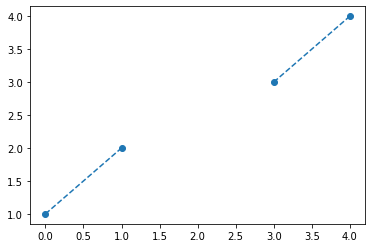

In [83]:
_x = [1,2,None,3,4] 
plt.plot(_x,'o--')

(예비학습끝) 

In [84]:
df.iloc[1:].set_index(('행정구역별','행정구역별')).stack().reset_index().\
query('level_1=="비율"').set_index(('행정구역별','행정구역별')).iloc[:,1:].T.\
applymap(lambda x: float(x) if x!='-' else None)

"(행정구역별, 행정구역별)",서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2000,5.4,6.0,5.9,5.4,5.6,5.5,4.0,NaN,5.7,9.3,9.1,11.2,10.3,11.9,10.7,8.4,8.0
2005,7.2,8.3,7.8,6.9,7.1,6.9,5.3,NaN,7.1,12.1,11.3,13.3,12.9,15.6,13.4,10.2,10.0
2010,9.7,11.3,10.0,8.6,9.0,8.7,6.8,NaN,8.7,14.8,13.2,14.9,15.2,18.3,15.6,11.8,12.2
2015,12.6,14.6,12.7,10.7,11.3,10.9,8.8,10.6,10.5,16.9,14.8,16.4,17.8,20.5,17.7,13.8,13.8
2021. 06,16.4,19.8,17.0,14.4,14.5,14.8,13.1,10.0,13.5,21.2,18.4,19.5,21.8,23.9,22.2,17.9,16.0


`-` 이제 그리자 
- 에러 뜨는 이유 한글때문에!

<AxesSubplot:>

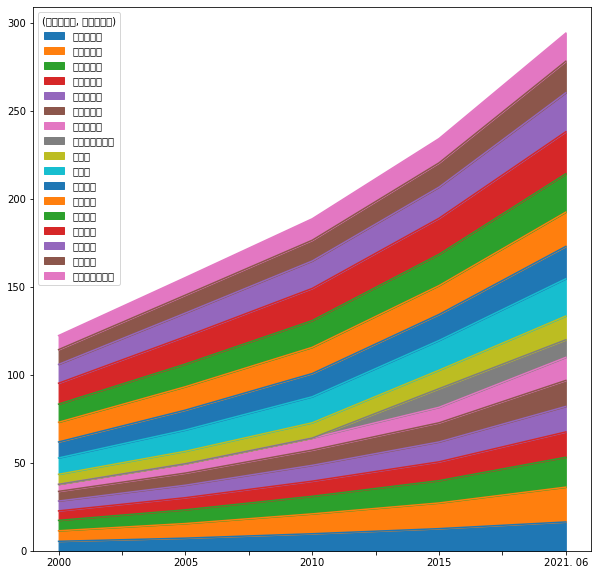

In [86]:
import warnings 
warnings.filterwarnings('ignore')
df.iloc[1:].set_index(('행정구역별','행정구역별')).stack().reset_index().\
query('level_1=="비율"').set_index(('행정구역별','행정구역별')).iloc[:,1:].T.\
applymap(lambda x: float(x) if x!='-' else None).\
plot.area(figsize=(10,10))

- 한글이 깨져서 나온다 $\to$ 고칠수 있지만 그냥 하지말자. 

#### 예제2 (plotly) 

`-` 우선 타이다한 자료를 만들자. 

In [88]:
df.iloc[1:].set_index(('행정구역별','행정구역별')).stack().applymap(lambda x: float(x) if x!='-' else None).\
stack().reset_index()

,"(행정구역별, 행정구역별)",level_1,level_2,0
0,서울특별시,비율,2000,5.4
1,서울특별시,비율,2005,7.2
2,서울특별시,비율,2010,9.7
3,서울특별시,비율,2015,12.6
4,서울특별시,비율,2021. 06,16.4
...,...,...,...,...
159,제주특별자치도,인구,2000,43334.0
160,제주특별자치도,인구,2005,55795.0
161,제주특별자치도,인구,2010,69641.0
162,제주특별자치도,인구,2015,85893.0


In [89]:
_df = _

In [90]:
_df

,"(행정구역별, 행정구역별)",level_1,level_2,0
0,서울특별시,비율,2000,5.4
1,서울특별시,비율,2005,7.2
2,서울특별시,비율,2010,9.7
3,서울특별시,비율,2015,12.6
4,서울특별시,비율,2021. 06,16.4
...,...,...,...,...
159,제주특별자치도,인구,2000,43334.0
160,제주특별자치도,인구,2005,55795.0
161,제주특별자치도,인구,2010,69641.0
162,제주특별자치도,인구,2015,85893.0


`-` 이름을 바꾸자. 

In [91]:
_df.columns = pd.Index(['city','type','year','value'])

In [92]:
_df

,city,type,year,value
0,서울특별시,비율,2000,5.4
1,서울특별시,비율,2005,7.2
2,서울특별시,비율,2010,9.7
3,서울특별시,비율,2015,12.6
4,서울특별시,비율,2021. 06,16.4
...,...,...,...,...
159,제주특별자치도,인구,2000,43334.0
160,제주특별자치도,인구,2005,55795.0
161,제주특별자치도,인구,2010,69641.0
162,제주특별자치도,인구,2015,85893.0


`-` 이제 그려보자. 

In [93]:
fig=_df.query('type=="비율"').plot.area(backend='plotly',x='year',y='value',color='city')
show(fig)

- 발표를 할 때 시각화할때가 많겠지?
- 또한 발표하는 중에 시각화 자료를 준비안했는데, 요구하는 경우도 있겠지?
- 빨리 만들어줘야 그 회의시간에 시기적절하게 제시할 수 있겠지?
- 순간적으로 머리속으로 구조하고 그리는 게 어렵지..